In [1]:
# This file is designed to contain the code for running Monte Carlo simulations in generating zero-coupon bond price 
# and the yield curve

import math
import random
from array import array

face = 1 #change this later


def r_generator (a,b,r0,sigma,num_its): #Creates an array of r_t (discrete)
	i = 0
	r = [r0]
	for i in range(num_its): #goes from i = 0 to (numb_its - 1)
		brownian = random.normalvariate(0, 1) #Brownian motion variable
		r_new = r[i] + a*(b-r[i]) + sigma*brownian #calculates each r_t
		r.append(r_new)
	return r



def monte_carlo_ZCB (a,b,sigma,r0,dt,t0,tf,numb_sims,face):
	#Returns a matrix that is [numb_sims]by[numb_iterations]
	number_iterations = int((tf-t0)/dt) #number of iterations per simulation
	i = 0 #delete?
	ZCB_price = []
	tau = tf-t0
	for i in range(numb_sims): #iterates through the simulations
		ZCB_one_round = [] #initializes disposable array 
		r_one_round = r_generator(a,b,r0,sigma,number_iterations) #calculates the r_t
		#
		B = (1-math.exp(-a*tau))/a #calculates B (equation 18b)
		A = float(face*math.exp((B-tau)*(b-(sigma**2)/(2*(a**2)))-((sigma**2)*(B**2))/(4*a)))  #calculates equation 18a
		for j in range(number_iterations): #iterates through time
			ZCB_one_round.append(A*math.exp(-B*r_one_round[j]))
		ZCB_price.append(ZCB_one_round) #MAKE SURE THIS APPENDS THE VALUES TO A NEW LIST IN THIS ARRAY
	return ZCB_price
	
def yield_curve (maturities,a,b,sigma,r0,dt,t0,tf,numb_sims): #calculates the yield curve
	#maturities is an array of the times-to-maturity
	yield_sims = [] 
	#Will hold numb_sims of yield
	yield_time_sim = [] 
	#Will hold [time_iterations]by[numb_sims]
	yield_all = [] 
	#Will be final [len(maturities)]by[time_iterations]by[numb_sims]
	for j in range(len(maturities)): #iterates through each maturity term
		ZCB_prices = monte_carlo_ZCB(a,b,sigma,r0,dt,t0,tf,numb_sims,face) 
		time_iterations = int((tf-t0)/dt)
		for i in range(time_iterations):
			for k in range(numb_sims):
				yield_sims.append(-1*math.log(ZCB_prices[k][i])/maturities[j])
			#This calculates and appends the yield at simulation k with maturity j, at time i (I hope)
			yield_time_sim.append(yield_sims)
		yield_all.append(yield_time_sim)
	return yield_all
	
maturities = [1,2,3]
print(yield_curve(maturities,.1,0,.1,0,.05,0,1,1))


#def hull_white (a,b,r0,sigma,dt,t0,tf,face,in_yield,N) #calculates ZCB price
#in_yield is an array (N by M) of the starting values on the yield curve, with N points with M maturities

#print(r_generator(.1,0,0,1,.05,0,2))

[[[-0.001547297664640669, 0.008032016740568413, 0.053796403187929095, 0.1044033876960157, 0.04692492487791465, 0.08253440095429734, 0.09224259301522171, 0.17016970045364618, 0.16553561420339005, 0.16570493535920555, 0.13229535918832924, 0.18573560779122505, 0.23009359901523835, 0.2505737941841371, 0.13882437787350865, 0.2150410462019617, 0.15553810940677723, 0.20737018101066435, 0.26882147465868045, 0.1739973292655528, -0.0007736488323203346, 0.09509451508189488, 0.03896163425790805, -0.001176720050423585, -0.011868426524455798, -0.03146145329828045, 0.011583237419804502, 0.023931282968128294, -0.006424341652375724, 0.04299698397225307, 0.06918436747037394, 0.022486802033067178, 0.03021414271342468, 0.07751558357390609, 0.12787725235898745, 0.10185709043288976, 0.15750428031472635, 0.0780881981050224, 0.09514591763814635, 0.059742251264151204, -0.0005157658882135564, -0.0318254144311617, -0.0582817390945056, -0.0032273957043881803, -0.025236096601882693, -0.05600343305315953, -0.042664

expected [0.5        0.53473455 0.56705613 0.59713235 0.6251192  0.65116184
 0.67539531 0.69794531 0.71892878 0.73845454 0.75662387 0.77353099
 0.78926359 0.80390326 0.81752593 0.83020224 0.84199794 0.8529742
 0.86318795 0.87269216 0.88153612 0.8897657  0.89742358 0.90454947
 0.91118033 0.91735056 0.92309214 0.92843486 0.93340643 0.93803262
 0.94233744 0.94634321 0.9500707  0.95353924 0.95676683 0.9597702
 0.96256493 0.96516551 0.96758543 0.96983724 0.97193262 0.97388243
 0.9756968  0.97738512 0.97895616 0.98041805 0.98177839 0.98304423
 0.98422213 0.98531821 0.98633814 0.98728722 0.98817036 0.98899216
 0.98975686 0.99046844 0.99113059 0.99174674 0.99232009 0.9928536
 0.99335006 0.99381202 0.9942419  0.99464191 0.99501413 0.99536049
 0.9956828  0.99598271 0.99626179 0.99652148 0.99676313 0.99698799
 0.99719723 0.99739194 0.99757312 0.99774171 0.99789859 0.99804457
 0.99818042 0.99830682 0.99842444 0.9985339  0.99863575 0.99873052
 0.99881871 0.99890077 0.99897713 0.99904819 0.99911431 

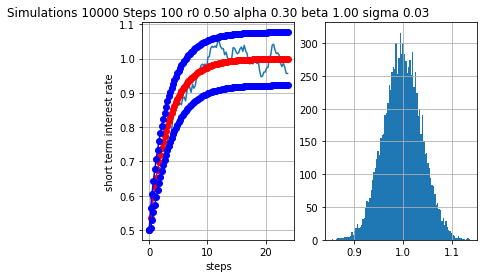

In [14]:
"""ir.py: Script that compares various Interest Rate term structure models.

A common model used in the financial industry for modelling the short rate (think overnight rate, but actually an infinitesimally short amount of time) is the Vasicek model. #
Although it is unlikely to perfectly fit the yield curve, it has some nice properties that make it a good model to work with. 
The dynamics of the Vasicek model are describe below.

In this model, the parameters  are constants, and the random motion is generated by the Q measure Brownian motion . 
An important property of the Vasicek model is that the interest rate is mean reverting to , and the tendency to revert is controlled by . 
Also, this process is a diffusion process, hence Markovian, which will lead to some nice closed form formulas. 
Finally, the future value of the interest rate is normally distributed with the distribution .

"""

__author__ = "Alexander Baker"
__copyright__ = "Copyright 2012, The Hatch Project"
__credits__ = ["Alexander Baker"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Alexander Baker"
__email__ = "baker.alexander@gmail.com"
__status__ = "Production"

import numpy as np
from numpy.random import standard_normal
from numpy import array, zeros, sqrt, shape

from pylab import plot, title, xlabel, ylabel, show, figure, grid

r0 = 0.5 # current UK funding rate
theta = 1.00 # 1 % long term interest rate
k = 0.3
beta = 0.03

## simulate short rate paths
n = 10000    # MC simulation trials
T = 24    # total time
m = 100   # subintervals
dt = T/m  # difference in time each subinterval
 
r = np.zeros(shape=(n, m), dtype=float) # matrix to hold short rate paths

fig1 = figure(1)
fig1.clf()
ax1a = fig1.add_subplot(121)

for j in np.arange(0,n): # number of MC simulations
	r[j,0] = r0
	for i in np.arange(1,m): #trials per simulation				
		r[j,i] = r[j,i-1] + k*(theta-r[j,i-1])*dt + beta*sqrt(dt)*standard_normal()		
		#print j,i, r[j,i]
ax1a.plot(np.arange(0, T, dt), r[j])
    
# plot paths
t = np.arange(0, T, dt)
rT_expected = theta + (r0-theta)*pow(np.e,-k*t)
rT_stdev = sqrt( pow(beta,2)/(2*k)*(1-pow(np.e,-2*k*t)))
print('expected', rT_expected, 'std', rT_stdev)

plot(np.arange(0, T, dt), rT_expected, '-or')
plot(np.arange(0, T, dt), rT_expected+2*rT_stdev, '-ob')
plot(np.arange(0, T, dt), rT_expected-2*rT_stdev, '-ob')

print(shape(t), shape(r))

title('Simulations %d Steps %d r0 %.2f alpha %.2f beta %.2f sigma %.2f' % (int(n), int(m), r0, k, theta, beta))
xlabel('steps')
ylabel('short term interest rate')
grid()

stock_ending_price = r[:,-1]
print('average ending rate ', np.mean(stock_ending_price))

ax2a = fig1.add_subplot(122)
ax2a.hist(stock_ending_price, 100)
ax2a.grid()

show()

#rT.stdev <- sqrt( beta^2/(2*k)*(1-exp(-2*k*t)))
#matplot(t, r[,1:10], type="l", lty=1, main="Short Rate Paths", ylab="rt") 
#abline(h=theta, col="red", lty=2)
#lines(t, rT.expected, lty=2) 
#lines(t, rT.expected + 2*rT.stdev, lty=2) 
#lines(t, rT.expected - 2*rT.stdev, lty=2) 
#points(0,r0)

expected [0.05       0.05347346 0.05670561 0.05971323 0.06251192 0.06511618
 0.06753953 0.06979453 0.07189288 0.07384545 0.07566239 0.0773531
 0.07892636 0.08039033 0.08175259 0.08302022 0.08419979 0.08529742
 0.08631879 0.08726922 0.08815361 0.08897657 0.08974236 0.09045495
 0.09111803 0.09173506 0.09230921 0.09284349 0.09334064 0.09380326
 0.09423374 0.09463432 0.09500707 0.09535392 0.09567668 0.09597702
 0.09625649 0.09651655 0.09675854 0.09698372 0.09719326 0.09738824
 0.09756968 0.09773851 0.09789562 0.09804181 0.09817784 0.09830442
 0.09842221 0.09853182 0.09863381 0.09872872 0.09881704 0.09889922
 0.09897569 0.09904684 0.09911306 0.09917467 0.09923201 0.09928536
 0.09933501 0.0993812  0.09942419 0.09946419 0.09950141 0.09953605
 0.09956828 0.09959827 0.09962618 0.09965215 0.09967631 0.0996988
 0.09971972 0.09973919 0.09975731 0.09977417 0.09978986 0.09980446
 0.09981804 0.09983068 0.09984244 0.09985339 0.09986357 0.09987305
 0.09988187 0.09989008 0.09989771 0.09990482 0.09991143

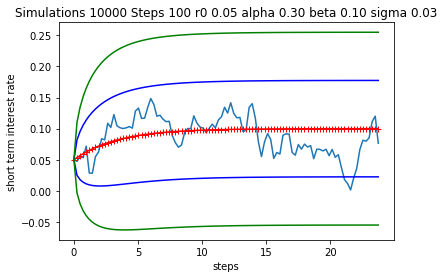

In [17]:
"""ir.py: Script that compares various Interest Rate term structure models.

A common model used in the financial industry for modelling the short rate (think overnight rate, but actually an infinitesimally short amount of time) is the Vasicek model. #
Although it is unlikely to perfectly fit the yield curve, it has some nice properties that make it a good model to work with. 
The dynamics of the Vasicek model are describe below.

In this model, the parameters  are constants, and the random motion is generated by the Q measure Brownian motion . 
An important property of the Vasicek model is that the interest rate is mean reverting to , and the tendency to revert is controlled by . 
Also, this process is a diffusion process, hence Markovian, which will lead to some nice closed form formulas. 
Finally, the future value of the interest rate is normally distributed with the distribution .

"""

__author__ = "Alexander Baker"
__copyright__ = "Copyright 2012, The Hatch Project"
__credits__ = ["Alexander Baker"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Alexander Baker"
__email__ = "baker.alexander@gmail.com"
__status__ = "Production"

import numpy as np
from numpy.random import standard_normal
from numpy import array, zeros, sqrt, shape

from pylab import plot, title, xlabel, ylabel, show

r0 = 0.05 # current UK funding rate
theta = 0.10 # 1 % long term interest rate
k = 0.3
beta = 0.03
 
## simulate short rate paths
n = 10000    # MC simulation trials
T = 24    # total time
m = 100   # subintervals
dt = T/m  # difference in time each subinterval
 
r = np.zeros(shape=(n, m), dtype=float) # matrix to hold short rate paths

for j in np.arange(0,n): # number of MC simulations
	r[j,0] = r0
	for i in np.arange(1,m): #trials per simulation				
		r[j,i] = r[j,i-1] + k*(theta-r[j,i-1])*dt + beta*sqrt(dt)*standard_normal()		
		#print j,i, r[j,i]
plot(np.arange(0, T, dt), r[j])		
 
## plot paths
t = np.arange(0, T, dt)
rT_expected = theta + (r0-theta)*pow(np.e,-k*t)
rT_stdev = sqrt( pow(beta,2)/(2*k)*(1-pow(np.e,-2*k*t)))
print('expected', rT_expected, 'std', rT_stdev)

plot(t, rT_expected, '-+r')
plot(t, rT_expected+2*rT_stdev, '-b')
plot(t, rT_expected-2*rT_stdev, '-b')
plot(t, rT_expected+4*rT_stdev, '-g')
plot(t, rT_expected-4*rT_stdev, '-g')

print(shape(t), shape(r))

title('Simulations %d Steps %d r0 %.2f alpha %.2f beta %.2f sigma %.2f' % (int(n), int(m), r0, k, theta, beta))
xlabel('steps')
ylabel('short term interest rate')
show()

#rT.stdev <- sqrt( beta^2/(2*k)*(1-exp(-2*k*t)))
#matplot(t, r[,1:10], type="l", lty=1, main="Short Rate Paths", ylab="rt") 
#abline(h=theta, col="red", lty=2)
#lines(t, rT.expected, lty=2) 
#lines(t, rT.expected + 2*rT.stdev, lty=2) 
#lines(t, rT.expected - 2*rT.stdev, lty=2) 
#points(0,r0)